# ACE 592 - "All the President's Moods" Assignment

## Vitor Machado de Oliveira Fernandes
    

In [7]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import matplotlib
import re
import string
from nltk.corpus import stopwords
import regex
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

\
\
**1- Load a json file of all the president's tweets from August 30 to November 5th**.

Put the following information into a dataframe: The full text of the Tweet; Any users mentioned in the Tweet. (string); The timestamp. (datetime); The date (YYYY-MM-DD) of the Tweet. (date); Retweets (numeric); Favorites (numeric); Whether the Tweet was censored, meaning zero retweets (binary/boolean).

In [51]:
trump_twt = pd.read_json(r"/Users/VMOF/Desktop/Ace592 hw1 data/Trump_tweets.json")
#trump_twt.info()
#trump_twt.head(3)

trump_twt = trump_twt.drop_duplicates(subset=['created_at', 'full_text'], keep = 'first') #droping duplicate tweets

In [27]:
trump_twt = trump_twt.loc[:,("created_at","full_text","favorite_count","retweet_count","entities")]
trump_twt["censored"] = trump_twt["retweet_count"] == 0
trump_twt.rename({"created_at": "timestamp"}, axis = 1, inplace = True)
trump_twt["date"] = trump_twt["timestamp"].dt.date
trump_twt["timestamp"] = pd.to_datetime(trump_twt["timestamp"])

#trump_twt.head(2)

\
\
**2- Create a "clean_text" column by doing the following to "full_text":**

removing links(http), hashtags, mentions, converting text to lower case, removing punctuation.

In [29]:
#re is already imported
trump_twt["clean_text"] = trump_twt['full_text'].str.lower().str.replace("\n","") #lower casing
trump_twt["clean_text"] = [re.sub(r'@\w+', '', x) for x in trump_twt["clean_text"]] #remove @s
trump_twt["clean_text"] = [re.sub(r'#\w+', '', x) for x in trump_twt["clean_text"]] #remove hashtags
trump_twt["clean_text"] = [re.sub(r"http\S+", '', x) for x in trump_twt["clean_text"]] #remove links
trump_twt["clean_text"] = [re.sub(r'[^\w\s]', '',x) for x in trump_twt["clean_text"]] #removing punctuation

#trump_twt.head(3) #it worked

,timestamp,full_text,favorite_count,retweet_count,entities,censored,date,clean_text
0,2020-11-05 15:37:40+00:00,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,124472,27745,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,2020-11-05,fmr nv ag laxalt no question trump would have ...
1,2020-11-05 15:09:19+00:00,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,0,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",True,2020-11-05,any vote that came in after election day will ...
2,2020-11-05 14:12:37+00:00,STOP THE COUNT!,750449,120833,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,2020-11-05,stop the count


**Now report:**\
The top 10 most common words (omitting stop words).
The top 5 Twitter accounts that are mentioned.
The top 5 most liked ("favorited") tweets.
The top 5 hashtags (hint: use a regular expression).

**Sorting tweets by most favorited:**

In [50]:
most_liked = trump_twt.sort_values(by = "favorite_count", ascending = False)
print(most_liked.full_text[0:5])

1014    Tonight, @FLOTUS and I tested positive for COV...
1012       Going welI, I think! Thank you to all. LOVE!!!
17      WE ARE LOOKING REALLY GOOD ALL OVER THE COUNTR...
16       I will be making a statement tonight. A big WIN!
24      This Tweet from @realDonaldTrump has been with...
Name: full_text, dtype: object


**Top 10 most common words:**

In [44]:
#top 10 most common words (- stop words)
from nltk.corpus import stopwords
words = [x.split(" ") for x in trump_twt["clean_text"]]
sw_list = stopwords.words('english') + [" ", '']
words_list = [pd.Series(x).value_counts() for x in words]
word_df = pd.concat(words_list,axis=1).fillna(0).T

# removing stopwords:
words_nsw = word_df.loc[:,~word_df.T.index.isin(sw_list)]

words_nsw.sum().sort_values(ascending=False).head(10)

biden     294.0
great     264.0
vote      232.0
amp       218.0
joe       208.0
thank     186.0
people    133.0
get       120.0
big       108.0
trump     103.0
dtype: float64

**Top five hashtags:**

In [45]:
#Came to the conclusion that using "full_text" instead of entities is easier.

counts = trump_twt["full_text"].str.findall(r'(#\w+)').explode().value_counts()
counts.head(5)

#MAGA                     116
#VOTE                       8
#MakeAmericaGreatAgain      7
#2A                         7
#TrumpPence2020             4
Name: full_text, dtype: int64

**Top 5 twitter accounts mentioned:**

In [46]:
counts2 = trump_twt["full_text"].str.findall(r'(@\w+)').explode().value_counts()
counts2.head(5)

@BreitbartNews    49
@FoxNews          31
@OANN             10
@CNN               8
@cspan             8
Name: full_text, dtype: int64

\
\
**3- Graph the daily volume of tweets over time, while annotating any major events.**

In [47]:
plot_data = trump_twt.groupby(["date"]).count()

Text(0, 0.5, '# of tweets')

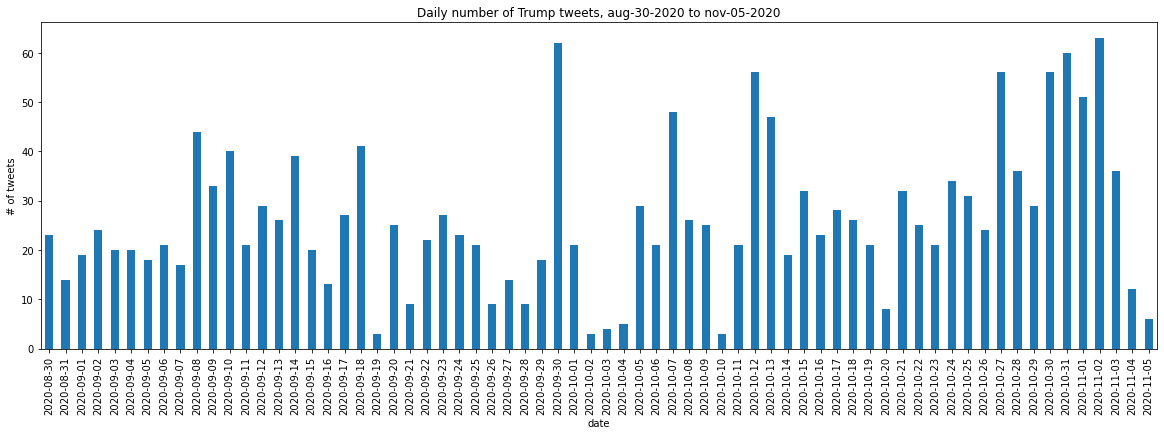

In [59]:
plot_data["full_text"].plot(kind='bar',figsize=(20,6),legend=None) #now find a way of annotating major events - maybe use plt.xticks((old),(new))
plt.title("Daily number of Trump tweets, aug-30-2020 to nov-05-2020")
plt.ylabel("# of tweets")

# label_list = [
#     (pd.to_datetime("2020-11-3"), 'Election day', 'y'),
#     (pd.to_datetime("2020-10-1"), "Trump gets COVID", 'b'),
#     (pd.to_datetime("2020-9-27"), "1st Debate", 'g'),
#     (pd.to_datetime("2020-10-7"), "2nd Debate", 'g'),
#     (pd.to_datetime("2020-10-22"), "3rd Debate", 'g')
# ]

# ax = plt.gca()

# for date_point, label, clr in label_list:
#     plt.axvline(x=date_point, color=clr)
#     plt.text(date_point, ax.get_ylim()[1]-4, label,
#              horizontalalignment='center',
#              verticalalignment='center',
#              color=clr,
#              bbox=dict(facecolor='white', alpha=0.9)) ##DIDNT WORK


\
\
**4 - Run the tweets through sentiment analysis, and report:** \
The 20 most "negative" and "positive" words.
A graph of the sentiment over time.

In [39]:
sid = SentimentIntensityAnalyzer()

In [55]:
trump_twt["sentiment"] = [sid.polarity_scores(x)['compound'] for x in trump_twt["full_text"]]

In [64]:
#plotsentiments

trump_twt[["date", "full_text", "sentiment"]].head(4) #that's not what i want

,date,full_text,sentiment
0,2020-11-05,fmr nv ag laxalt no question trump would have ...,0.6249
1,2020-11-05,any vote that came in after election day will ...,0.0000
2,2020-11-05,stop the count,-0.2960
3,2020-11-05,detroit absentee ballot counting chaos blocked...,-0.7845


In [65]:
words_sentiment = [sid.polarity_scores(x)['compound'] for x in words_nsw]

**5 - Trump and the Stock Market**

Read in the time series dataset of S&P 500 closing, daily prices. Then merge this data to Trump's daily sentiment scores. Graph both of them (EXTRA CREDIT GRAPH), calculate their correlation, and interpret what you see.

Since Trump often comments on the stock market but the stock market may also react to his tweets, it is not clear how the causal relationship should work. Describe in detail how you would answer the question: "Did President Trump's tweet sentiment influence the stock market?" Specifically describe:

The data you would need in addition to these data sources.
The way you would read in the data and manipulate it.
The sort of analysis or statistics you would calculate to answer the question.

In [72]:
stock_prices = pd.read_csv(r"/Users/VMOF/Desktop/Ace592 hw1 data/SandP500.csv", delimiter = ',')
stock_prices = stock_prices.rename(columns={'DATE':'date', 'SP500':'sp500'})
stock_prices["date"] = pd.to_datetime(stock_prices["date"])

stock_prices = stock_prices[(stock_prices['date'] > '2020-08-30') & (stock_prices['date'] < '2020-11-05')]
stock_prices = stock_prices.drop(stock_prices[stock_prices.sp500 == '.'].index)
stock_prices["sp500"] = pd.to_numeric(stock_prices["sp500"])
stock_prices = stock_prices.set_index(stock_prices['date'])

<Figure size 1224x720 with 0 Axes>

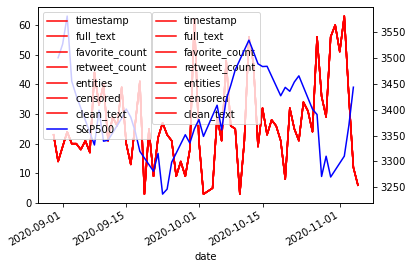

In [77]:
plt.figure(figsize=(17,10))
ax1 = plot_data.plot(color='red', label='Tweet count')
ax2 = stock_prices.sp500.plot(color='blue', label='S&P500', secondary_y=True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()
